In [1]:
#常用
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
import warnings
warnings.filterwarnings('ignore')

#統計
import scipy.stats as st

#機器學習
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#系統操作、解壓縮檔案
import os
from zipfile import ZipFile

In [2]:
###資料匯入
class DataImport:
    def __init__(self):
        self.data_dir = os.getcwd()
    
    #資料夾路徑
    def set_dir(self, data_path):
        self.data_dir = os.path.join(self.data_dir, data_path)
    
    #壓縮檔名 
    def read_zip(self, filename):
        self.file_path = os.path.join(self.data_dir, filename)
        print('Path of read in data: %s' % (self.file_path))
        myzip=ZipFile(self.file_path)
        for i in myzip.filelist:
            print(i.filename)
        myzip.close()
    
    #讀取壓縮檔內的資料
    def read_zip_data(self, dataname):
        myzip=ZipFile(self.file_path)
        f=myzip.open(dataname)
        df=pd.read_csv(f)
        f.close()
        myzip.close()
        return df

def feature_eda(feature_name, log1p=0, astype=[0,'object']):
    if log1p:
        feature = np.log1p(train[feature_name])
    else:
        feature = train[feature_name]
    if astype[0]:
        feature = feature.astype(astype[1])
    test_feature = test[feature_name]
    target = train['SalePrice']

    print('Type : {}'.format(feature.dtypes))
    na_ratio = feature.isna().sum()/len(feature)
    print('NA Ratio : {}'.format(na_ratio))
    na_ratio = test_feature.isna().sum()/len(test_feature)
    print('Test NA Ratio : {}'.format(na_ratio))
    
    unique_ct, unique_ratio =len(feature.unique()), len(feature.unique())/len(feature)
    print('unique_ct : {}, unique_ratio : {:.2f}'.format(unique_ct, unique_ratio))
    
    if feature.dtypes in ['float','int64']:
        feature_summarize= pd.DataFrame(feature.describe()).T
        feature_summarize['skew'] = feature.skew()
        feature_summarize['kurt'] = feature.kurt()
        print(feature_summarize)

        plt.figure(1,figsize=(6, 4))
        plt.title(feature_name)
        sns.distplot(feature, 
                     kde=False, 
                     fit=st.norm)

        plt.figure(2,figsize=(6, 4))
        res = st.probplot(feature,plot=plt)

        plt.figure(3,figsize=(6, 4))
        sns.boxplot(feature)
        plt.show()
        
        plt.figure(4,figsize=(6, 4))
        sns.jointplot(x=feature, y=target,kind='scatter',color='#0066CC')
        plt.show()
    else:
        plt.figure(1,figsize=(8, 6))
        sns.boxplot(x=feature, y=target,color='#0066CC')
        plt.xticks(rotation=90)
        plt.show()

In [3]:
DTImport = DataImport()
DTImport.set_dir(data_path = './data/')
DTImport.read_zip(filename = 'house-prices.zip')
train = DTImport.read_zip_data(dataname = 'train.csv')
test = DTImport.read_zip_data(dataname = 'test.csv')

Path of read in data: C:\Users\RT009223\Github\Projects\SideProject\03_Kaggle_House_Prices\./data/house-prices.zip
data_description.txt
sample_submission.csv
test.csv
train.csv


In [4]:
# features = pd.DataFrame(columns=['features','features_name','type','astype','drop_YN','outlier','missing_values','feature_engineer'])
# features['features'] = train.columns
# features.to_excel(r'Features_v3.xlsx',index=0)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Type : object
NA Ratio : 0.0
Test NA Ratio : 0.0
unique_ct : 3, unique_ratio : 0.00


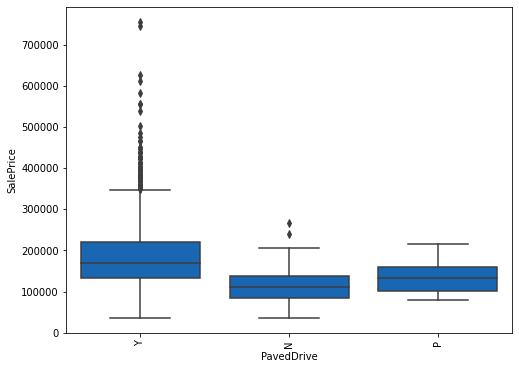

In [22]:
feature_name = 'PavedDrive'
feature_eda(feature_name = feature_name,log1p=0,astype=[0,'object'])

In [18]:
train_feature= pd.Series(train[feature_name].astype('object').unique())
test_feature= pd.Series(test[feature_name].astype('object').unique())
test_feature[-test_feature.isin(train_feature)]

Series([], dtype: object)

In [19]:
train02 = train.copy()
train02.fillna('NA',inplace=True)

In [20]:
# train02['type'] = train02[feature_name]>0
# train02.groupby(['type'])['SalePrice'].agg(['mean','count']).sort_values(by = 'mean',ascending=False)

In [21]:
train02.groupby([feature_name])['SalePrice'].agg(['mean','count']).sort_values(by = 'mean',ascending=False)

,mean,count
GarageCond,,
TA,187885.735294,1326
Gd,179930.000000,9
Ex,124000.000000,2
Fa,114654.028571,35
Po,108500.000000,7
NA,103317.283951,81


In [241]:
# train.groupby([feature_name])['SalePrice'].mean().reset_index().sort_values(by = 'SalePrice',ascending=False)

In [402]:
train02.groupby([feature_name])['SalePrice'].mean().to_dict()

{'Fin': 240052.6903409091,
 'NA': 103317.28395061729,
 'RFn': 202068.86966824645,
 'Unf': 142156.42314049587}

In [11]:
train[feature_name][(train[feature_name]>1220)].index
# train[feature_name][(train[feature_name]>4200)&(train['SalePrice']<300000)].index

Int64Index([581, 1061, 1190, 1298], dtype='int64')

In [ ]:
feature_astype=['MSSubClass','Utilities','YearBuilt','YearRemodAdd','FullBath']

feature_drop=['Id','Alley','Condition2','RoofMatl','ExterCond','BsmtFinSF2','BsmtUnfSF','Heating',
              'LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'Functional','GarageYrBlt']
index_drop=[934, 1298, 297, 523, 581, 1061, 1190]

feature_add=['BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GarageArea']
feature_multi=['BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GarageArea']
feature_limit=['TotRmsAbvGrd','GarageCars']

na_median=['LotFrontage']
na_0=['MasVnrArea','GarageCars','GarageArea']
na_NA=['Exterior2nd','MasVnrType','BsmtQual','BsmtExposure','BsmtFinType1','Electrical','KitchenQual',
       'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

feature_onehot=['MSZoning','Street','LotShape','LandContour',
                'LotConfig','LandSlope','BldgType','YearBuilt','YearRemodAdd',
                'RoofStyle','Exterior2nd','Foundation','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','CentralAir','KitchenQual','FireplaceQu',
                'GarageType','GarageQual','GarageCond']

feature_lop1p=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF',
               'GrLivArea','GarageArea']

replace_words={}
replace_words['MSSubClass']={
    "['30','45','50','85','90','150','160','180','190']":1,
    "['20','40','70','75','80']":2,
    "['60','120']"
}
replace_words['Neighborhood']={
 'Blmngtn': 194870.88235294117,
 'Blueste': 137500.0,
 'BrDale': 104493.75,
 'BrkSide': 124834.05172413793,
 'ClearCr': 212565.42857142858,
 'CollgCr': 197965.77333333335,
 'Crawfor': 210624.72549019608,
 'Edwards': 128219.7,
 'Gilbert': 192854.50632911394,
 'IDOTRR': 100123.78378378379,
 'MeadowV': 98576.4705882353,
 'Mitchel': 156270.1224489796,
 'NAmes': 145847.08,
 'NPkVill': 142694.44444444444,
 'NWAmes': 189050.0684931507,
 'NoRidge': 335295.31707317074,
 'NridgHt': 316270.6233766234,
 'OldTown': 128225.30088495575,
 'SWISU': 142591.36,
 'Sawyer': 136793.13513513515,
 'SawyerW': 186555.7966101695,
 'Somerst': 225379.83720930232,
 'StoneBr': 310499.0,
 'Timber': 242247.44736842104,
 'Veenker': 238772.72727272726}
replace_words['Condition1']={
    "['Artery','RRAe','Feedr']":1,
    "['RRAn','Norm','RRNe']":2,
    "['RRNn','PosN','PosA']":3
}
replace_words['HouseStyle']={'1.5Fin': 143116.74025974027,
 '1.5Unf': 110150.0,
 '1Story': 175985.4779614325,
 '2.5Fin': 220000.0,
 '2.5Unf': 157354.54545454544,
 '2Story': 210051.76404494382,
 'SFoyer': 135074.48648648648,
 'SLvl': 166703.38461538462}
replace_words['Exterior1st']={
    "['BrkComm','AsphShn','CBlock','AsbShng','MetalSd','Wd Sdng']":1,
    "['WdShing','Stucco','HdBoard','Plywood','BrkFace']":2,
    "['VinylSd','CemntBd','Stone','ImStucc']":3
}
replace_words['ExterQual']={
 'Ex': 367360.96153846156,
 'Fa': 87985.21428571429,
 'Gd': 231633.51024590165,
 'TA': 144341.31346578366}
replace_words['BsmtCond']={
 'Fa': 121809.53333333334,
 'Gd': 213599.9076923077,
 'Po': 64000.0,
 'TA': 183632.6209000763}
replace_words['HeatingQC']={
 'Fa': 121809.53333333334,
 'Gd': 213599.9076923077,
 'Po': 64000.0,
 'TA': 183632.6209000763}
replace_words['Electrical']={
    "['Mix','FuseP','FuseF','FuseA','NA']":0
    "SBrkr":1
}
replace_words['FullBath']={
    "['0','1']":0
    "['2','3','4']":1
}
replace_words['GarageFinish']={
 'Fin': 240052.6903409091,
 'NA': 103317.28395061729,
 'RFn': 202068.86966824645,
 'Unf': 142156.42314049587}

In [129]:
df01 = pd.DataFrame({'a':['1','2','3','4'],'b':['4','5','6','7']})

In [130]:
df01

,a,b
0,1,4
1,2,5
2,3,6
3,4,7


In [132]:
rw = {
    "['1','2']":'9'
}

In [133]:
df01.replace(regex = rw)

,a,b
0,9,4
1,9,5
2,3,6
3,4,7
